In [1]:
#pytorch_basic
import torch
torch.cuda.is_available()

True

Sử dụng GPU và Cuda

In [2]:
torch.cuda.current_device()

0

In [3]:
torch.cuda.get_device_name(0)

'Tesla T4'

In [4]:
torch.cuda.memory_allocated()

0

In [5]:
#Trả về bộ nhớ GPU hiện tại được quản lý bởi bộ phân bố bộ nhớ đệm theo byte
torch.cuda.memory_cached()

<ipython-input-5-a8ef6925090f>:2: FutureWarning: `torch.cuda.memory_cached` has been renamed to `torch.cuda.memory_reserved`
  torch.cuda.memory_cached()


0

In [ ]:
# loading data Iris
from sklearn.datasets import load_iris
iris = load_iris()
iris.head()

Dataset with pytorch

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
df.shape

(150, 6)

In [15]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
le = LabelEncoder()
X= df.drop(["Id","Species"], axis =1).values
y= le.fit_transform(df["Species"].values)
# chia dữ liệu với test size =0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train).reshape(-1, 1)
y_test = torch.LongTensor(y_test).reshape(-1, 1)

In [16]:
print(f"train_size {len(y_train)}")

train_size 120


In [17]:
#labels, count = np.unique(y_train, return_counts=True)
labels, count = y_train.unique(return_counts=True)

print(labels, count)

tensor([0, 1, 2]) tensor([40, 41, 39])


In [ ]:
# Tính đạo hàm bằng pytorch

# cho y = 2x^4 + x^3 + 3x^2 + 5x +1

#tính y'

In [ ]:
import torch

In [ ]:
# Tạo 1 tensor với requirements_grad được đặt thành True

x = torch.tensor(2.0, requires_grad=True)
print(x)
print(x.grad)


tensor(2., requires_grad=True)
None


In [ ]:
# Định nghĩa hàm

y = 2*x**4 + x**3 + 3*x**2 + 5*x +1
print(y)

tensor(63., grad_fn=<AddBackward0>)


In [ ]:
y.grad_fn

In [ ]:
# Thực hiện truyền ngược và tính toán tất cả các gradient
y.backward()

In [ ]:
# Kết quả đạo hàm
x.grad

tensor(93.)

In [ ]:
# Bai tap

# Tính y' của y= 5x^6 + 3x^3 + 2x^1 + x + 2x + 5x^4 +1
x = torch.tensor(2.0, requires_grad=True)
print(x)
print(x.grad)
y = 5*x**6 + 3*x**3 + 2*x**1 + x + 2*x + 5*x**4 +1
print(y)
y.grad_fn
y.backward()
x.grad
# Cho biết độ dốc của đa thức trên tại điểm nào



tensor(2., requires_grad=True)
None
tensor(435., grad_fn=<AddBackward0>)


tensor(1161.)

In [ ]:
print(f"Độ dốc của y tại x = {x.item()} là: {x.grad.item()}")

Độ dốc của y tại x = 2.0 là: 1161.0


In [ ]:
#from dataclasses import MISSING
#BTVN 1
#Tạo 1 tensor x có giá trị ban đầu là 2.0

# định nghĩa hàm số và tính gradient
# y= x^3 + 2x^2 + 5x + 1

# hãy tính dy/dx tại giá trị của X
# dùng phương pháp gradient descent với learning rate alpha =0.1 để cập nhật gia trị x trong 10 vòng lặp torch.P
import torch

# Tạo tensor x với giá trị ban đầu là 2.0, bật requires_grad để tính gradient
x = torch.tensor(2.0, requires_grad=True)

# Định nghĩa hàm số y = x^3 + 2x^2 + 5x + 1
def function(x):
    return x**3 + 2*x**2 + 5*x + 1

# Tính gradient tại giá trị ban đầu x = 2.0
y = function(x)
y.backward()
initial_gradient = x.grad
print(f"Gradient ban đầu tại x = 2.0: {initial_gradient.item()}")
print(f"Giá trị ban đầu của y tại x = 2.0: {y.item()}")

# Gradient Descent với learning rate = 0.1, 10 vòng lặp
learning_rate = 0.1
print("\nQuá trình Gradient Descent:")
print(f"Giá trị ban đầu của x: {x.item()}, y: {function(x).item()}")

for i in range(10):
    # Reset gradient về 0
    if x.grad is not None:
        x.grad.zero_()

    # Tính giá trị hàm và gradient
    y = function(x)
    y.backward()

    # Cập nhật x theo gradient descent
    with torch.no_grad():
        x -= learning_rate * x.grad

    print(f"Vòng lặp {i+1}: x = {x.item():.6f}, y = {y.item():.6f}, gradient = {x.grad.item():.6f}")

print(f"\nGiá trị cuối cùng sau 10 vòng lặp: x = {x.item():.6f}, y = {function(x).item():.6f}")

Gradient ban đầu tại x = 2.0: 25.0
Giá trị ban đầu của y tại x = 2.0: 27.0

Quá trình Gradient Descent:
Giá trị ban đầu của x: 2.0, y: 27.0
Vòng lặp 1: x = -0.500000, y = 27.000000, gradient = 25.000000
Vòng lặp 2: x = -0.875000, y = -1.125000, gradient = 3.750000
Vòng lặp 3: x = -1.254688, y = -2.513672, gradient = 3.796875
Vòng lặp 4: x = -1.725085, y = -4.100136, gradient = 4.703972
Vòng lặp 5: x = -2.427826, y = -6.807298, gradient = 7.027413
Vòng lặp 6: x = -3.724998, y = -13.660884, gradient = 12.971715
Vòng lặp 7: x = -6.897680, y = -41.560375, gradient = 31.726830
Vòng lặp 8: x = -18.912006, y = -266.510193, gradient = 120.143257
Vòng lặp 9: x = -119.146408, y = -6142.375000, gradient = 1002.343933
Vòng lặp 10: x = -4330.747559, y = -1663589.500000, gradient = 42116.011719

Giá trị cuối cùng sau 10 vòng lặp: x = -4330.747559, y = -81187307520.000000


Giá trị ban đầu:
w = 0.5349, b = 0.8094

Vòng lặp 10:
MSE Loss = 2.8210
Gradient w = 0.2184, Gradient b = -1.5219
w = 3.5231, b = 1.3814

Vòng lặp 20:
MSE Loss = 2.5938
Gradient w = 0.2096, Gradient b = -1.4591
w = 3.5016, b = 1.5307

Vòng lặp 30:
MSE Loss = 2.3850
Gradient w = 0.2009, Gradient b = -1.3990
w = 3.4811, b = 1.6739

Vòng lặp 40:
MSE Loss = 2.1930
Gradient w = 0.1927, Gradient b = -1.3413
w = 3.4613, b = 1.8112

Vòng lặp 50:
MSE Loss = 2.0165
Gradient w = 0.1847, Gradient b = -1.2861
w = 3.4424, b = 1.9428

Vòng lặp 60:
MSE Loss = 1.8543
Gradient w = 0.1771, Gradient b = -1.2331
w = 3.4243, b = 2.0690

Vòng lặp 70:
MSE Loss = 1.7051
Gradient w = 0.1698, Gradient b = -1.1822
w = 3.4069, b = 2.1900

Vòng lặp 80:
MSE Loss = 1.5680
Gradient w = 0.1628, Gradient b = -1.1335
w = 3.3903, b = 2.3060

Vòng lặp 90:
MSE Loss = 1.4420
Gradient w = 0.1561, Gradient b = -1.0868
w = 3.3743, b = 2.4172

Vòng lặp 100:
MSE Loss = 1.3261
Gradient w = 0.1497, Gradient b = -1.0420
w = 3.3590, 

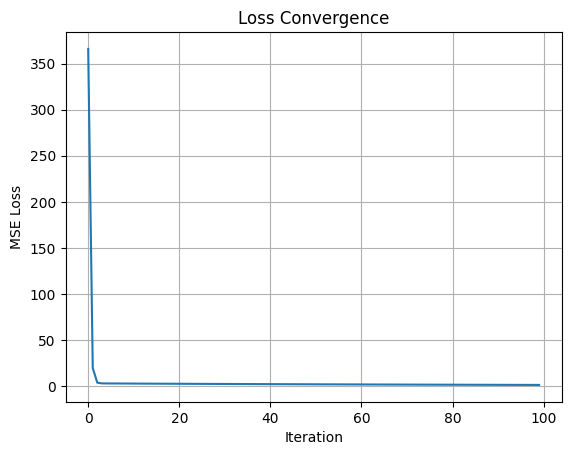

In [ ]:
# BTVN 2:

# Tạo 1 tập dữ liệu giả lập với x là số giờ học (ngẫu nhiên từ 1-10) và
# y là số điểm được tính theo công thức y = 3x +5 +noise
# với noise là 1 giá trị ngẫu nhiên nhỏ

# 1. Khởi tạo tham số w và b ngẫu nhiên với requires_grad=True
# 2. Tính mse
# 3. Tính gradient
# 4. Cập nhật tham số w và b bằng gradient descent với learning rate alpha =0.01
# 5. lặp lại quá trình trên trong 100 vòng lặp và quan sát sự hội tụ của mô hình
import torch
import numpy as np
import matplotlib.pyplot as plt

# 1. Tạo tập dữ liệu giả lập
torch.manual_seed(42)  # Để kết quả có thể tái hiện
x = torch.linspace(1, 10, 10)  # x từ 1 đến 10
noise = torch.randn(10) * 0.1  # Noise ngẫu nhiên nhỏ
y = 3 * x + 5 + noise  # y = 3x + 5 + noise

# 2. Khởi tạo tham số w và b ngẫu nhiên
w = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

# 3. Định nghĩa hàm dự đoán và MSE loss
def predict(x):
    return w * x + b

def mse_loss(y_pred, y_true):
    return ((y_pred - y_true) ** 2).mean()

# 4. Gradient Descent
learning_rate = 0.01
num_iterations = 100

# Lưu giá trị loss để quan sát
losses = []

print("Giá trị ban đầu:")
print(f"w = {w.item():.4f}, b = {b.item():.4f}\n")

# 5. Training loop
for i in range(num_iterations):
    # Forward pass
    y_pred = predict(x)
    loss = mse_loss(y_pred, y)

    # Backward pass
    loss.backward()

    # Lưu loss
    losses.append(loss.item())

    # In kết quả mỗi 10 vòng lặp, bao gồm MSE và gradient
    if (i + 1) % 10 == 0:
        print(f"Vòng lặp {i+1}:")
        print(f"MSE Loss = {loss.item():.4f}")
        print(f"Gradient w = {w.grad.item():.4f}, Gradient b = {b.grad.item():.4f}")
        print(f"w = {w.item():.4f}, b = {b.item():.4f}\n")

    # Cập nhật tham số
    with torch.no_grad():
        w -= learning_rate * w.grad
        b -= learning_rate * b.grad

        # Reset gradient
        w.grad.zero_()
        b.grad.zero_()

# In kết quả cuối cùng
print("Kết quả cuối cùng:")
print(f"w = {w.item():.4f} (thực tế: 3)")
print(f"b = {b.item():.4f} (thực tế: 5)")

# Vẽ đồ thị loss
plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('MSE Loss')
plt.title('Loss Convergence')
plt.grid(True)
plt.show()

In [ ]:
# pytorch with tensor
import torch
import numpy as np

In [ ]:
torch.__version__

'2.5.1+cu124'

In [ ]:
# Chuyển đổi mảng numpy sang tensor pytorch
arr = np.array([1,2,3,4,5])
print(arr)
print(arr.dtype)
print(type(arr))
x = torch.from_numpy(arr)
print(x)

[1 2 3 4 5]
int64
<class 'numpy.ndarray'>
tensor([1, 2, 3, 4, 5])


In [ ]:
print(x.dtype)
print(type(x))

torch.int64
<class 'torch.Tensor'>


In [ ]:
arr2= np.arange(0., 12.).reshape(4,3)
print(arr2)
x2 = torch.from_numpy(arr2)
print(x2)

[[ 0.  1.  2.]
 [ 3.  4.  5.]
 [ 6.  7.  8.]
 [ 9. 10. 11.]]
tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.],
        [ 9., 10., 11.]], dtype=torch.float64)


In [ ]:
x2=torch.from_numpy(arr2)
print(x2)
print(x2.type())

tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.],
        [ 9., 10., 11.]], dtype=torch.float64)
torch.DoubleTensor


copying and sharing

In [ ]:
arr = np.arange(0,5)
print(arr)
x = torch.from_numpy(arr)
print(x)
arr[0]=99
print(x)

[0 1 2 3 4]
tensor([0, 1, 2, 3, 4])
tensor([99,  1,  2,  3,  4])


In [ ]:
arr = np.arange(0,5)
print(arr)
x = torch.tensor(arr)
print(x)
arr[0]=99
print(x)

[0 1 2 3 4]
tensor([0, 1, 2, 3, 4])
tensor([0, 1, 2, 3, 4])


In [ ]:
# BTVN 3: bạn hãy giúp thầy về nhà tạo tensor với:
#empyty
tensor_empty = torch.empty(3, 4)
print("Tensor empty:\n", tensor_empty)



Tensor empty:
 tensor([[6.6380e-07, 1.0186e-11, 3.0881e-09, 4.2970e-05],
        [4.0975e-11, 2.6225e-09, 2.9572e-18, 0.0000e+00],
        [5.8688e-34, 0.0000e+00, 1.3593e-43, 0.0000e+00]])


In [ ]:
#zeros
tensor_zeros = torch.zeros(3, 4)
print("Tensor zeros:\n", tensor_zeros)

Tensor zeros:
 tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])


In [ ]:
#ones
tensor_ones = torch.ones(3, 4)
print("Tensor ones:\n", tensor_ones)

Tensor ones:
 tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])


In [ ]:
#random
tensor_random = torch.rand(3, 4)
print("Tensor random:\n", tensor_random)



Tensor random:
 tensor([[0.6977, 0.8000, 0.1610, 0.2823],
        [0.6816, 0.9152, 0.3971, 0.8742],
        [0.4194, 0.5529, 0.9527, 0.0362]])


In [ ]:
#reshape với view và view as
# Thay đổi hình dạng thành 2x6
# Tạo một tensor 1D với 12 phần tử
tensor = torch.arange(12)
print("Tensor ban đầu:\n", tensor)

tensor_reshape = tensor.reshape(2, 6)
print("Tensor sau khi dùng reshape:\n", tensor_reshape)

# Thay đổi hình dạng thành 3x4
tensor_view = tensor.view(3, 4)
print("Tensor sau khi dùng view:\n", tensor_view)

# Tạo một tensor khác với hình dạng 4x3
tensor_other = torch.randn(4, 3)
# Thay đổi hình dạng của tensor ban đầu để khớp với tensor_other
tensor_view_as = tensor.view_as(tensor_other)
print("Tensor sau khi dùng view_as:\n", tensor_view_as)


#dl 16/3

Tensor ban đầu:
 tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
Tensor sau khi dùng reshape:
 tensor([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11]])
Tensor sau khi dùng view:
 tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
Tensor sau khi dùng view_as:
 tensor([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]])


In [ ]:
# BTVN 3:giải thích lí do tại sao cho 2 trường hợp ở trên
# Phương thức torch.from_numpy() tạo ra một tensor chia sẻ cùng vùng nhớ
# với mảng NumPy đầu vào. Điều này có nghĩa là bất kỳ thay đổi nào trên mảng
# NumPy hoặc tensor sẽ được phản ánh lẫn nhau.

# Phương thức torch.tensor() tạo ra một tensor mới bằng cách sao chép dữ liệu
# từ mảng NumPy đầu vào. Điều này có nghĩa là tensor được tạo ra sẽ có vùng nhớ
# riêng biệt, không liên kết với mảng NumPy ban đầu. Do đó, khi bạn thay đổi
# giá trị trong mảng NumPy, tensor sẽ không bị ảnh hưởng, và ngược lại.